In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
lamarck = pd.read_csv("./Lamarck_rawdata.csv", header=0, index_col=[0,1])
print(lamarck.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/SSGA/SSGA_rawdata.csv"
SSGA = pd.read_csv(path,header=0,index_col=[0,1])
print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/Baldwin/Baldwin_rawdata.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0,1])
print(baldwin.shape)

df_together = pd.concat([lamarck,SSGA,baldwin],axis=0,keys=["Lamarck","SSGA","Baldwin"])
print(df_together.shape)
df_together = df_together.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
print(df_together.dtypes)

(230, 20)
(230, 20)
(230, 20)
(690, 20)
590    float64
593    float64
579    float64
588    float64
589    float64
591    float64
576    float64
587    float64
569    float64
558    float64
592    float64
572    float64
594    float64
542    float64
570    float64
562    float64
575    float64
573    float64
552    float64
555    float64
dtype: object


Lamarck  F1   Times1   590     0.496340
                       593     0.441634
                       579     0.498842
                       588     0.490256
                       589     0.470203
                                ...    
Baldwin  F23  Times10  562    -5.175647
                       575   -10.536269
                       573   -10.536258
                       552   -10.536265
                       555   -10.536279
Length: 13800, dtype: float64

,Function,Combinations,Mode,Times,solutions
0,F1,590,Lamarck,Times1,0.496340
1,F1,593,Lamarck,Times1,0.441634
2,F1,579,Lamarck,Times1,0.498842
3,F1,588,Lamarck,Times1,0.490256
4,F1,589,Lamarck,Times1,0.470203
...,...,...,...,...,...
13795,F23,562,Baldwin,Times10,-5.175647
13796,F23,575,Baldwin,Times10,-10.536269
13797,F23,573,Baldwin,Times10,-10.536258
13798,F23,552,Baldwin,Times10,-10.536265


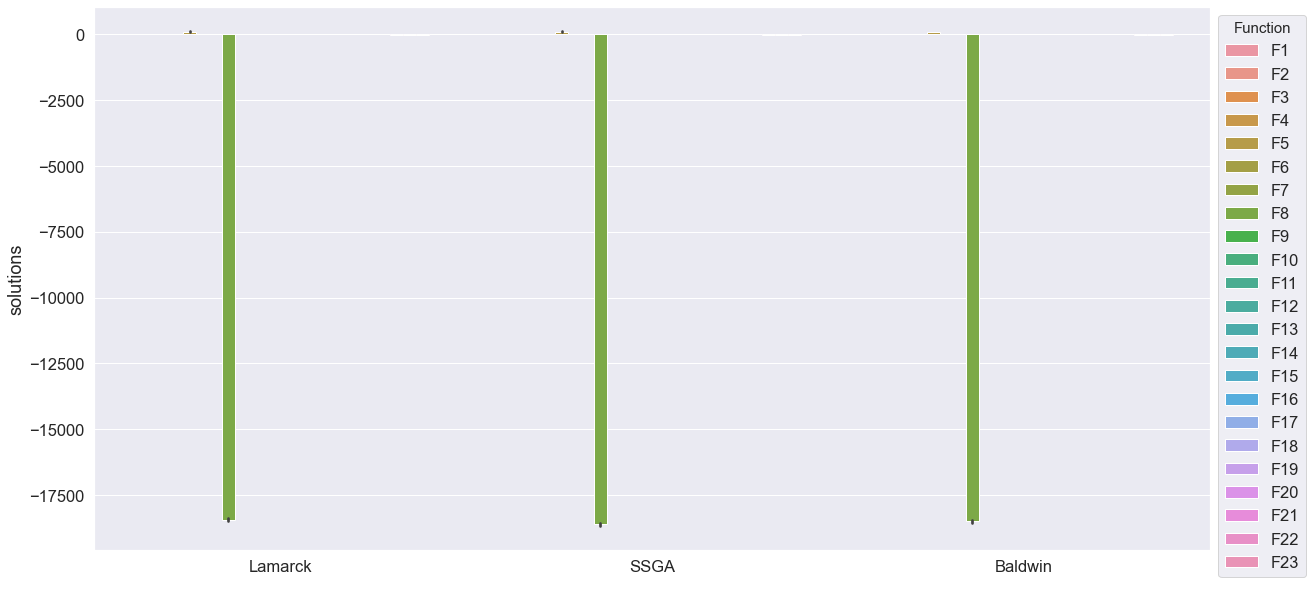

In [17]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="solutions")
dataframe["solutions"] = pd.to_numeric(dataframe["solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
mode_list=["SSGA","Baldwin","Lamarck"]
def show_graph(dataframe):
    sns.set(font_scale=1.5)
    sns.color_palette("viridis", as_cmap=True)
    dist_cols = 1
    dist_rows = 1
    plt.figure(figsize=(20 * dist_cols, 10 * dist_rows))
    i = 1
    plt.subplot(dist_rows, dist_cols, i)
    ax = sns.barplot(data=dataframe,y="solutions",hue="Function",x="Mode",dodge=True)
    plt.xlabel(" ")
    # plt.axhline(50,color="r")
    plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig("./together_barplot_rawdata{0}.png".format("lamarck_SSGA_Baldwin"), dpi=1200,bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [18]:
global_opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,
                    -10.1532, -10.4028, -10.5363]
df_opt = dataframe.copy()
cdf=[]
for f in range(1,24,1):
    opt = global_opt[f-1]
    f = "F"+str(f)
    dataf = df_opt[df_opt["Function"] == f]
    dataf["Percent"] = opt
    cdf.append(dataf)
cdf = pd.concat(cdf,axis=0)
cdf.rename(columns={'Percent': 'optimal'}, inplace=True)
print(cdf)

      Function Combinations     Mode    Times  solutions  optimal
0           F1          590  Lamarck   Times1   0.496340   0.0000
1           F1          593  Lamarck   Times1   0.441634   0.0000
2           F1          579  Lamarck   Times1   0.498842   0.0000
3           F1          588  Lamarck   Times1   0.490256   0.0000
4           F1          589  Lamarck   Times1   0.470203   0.0000
...        ...          ...      ...      ...        ...      ...
13795      F23          562  Baldwin  Times10  -5.175647 -10.5363
13796      F23          575  Baldwin  Times10 -10.536269 -10.5363
13797      F23          573  Baldwin  Times10 -10.536258 -10.5363
13798      F23          552  Baldwin  Times10 -10.536265 -10.5363
13799      F23          555  Baldwin  Times10 -10.536279 -10.5363

[13800 rows x 6 columns]


/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_48977/2669352897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf["Percent"] = opt
/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_48977/2669352897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf["Percent"] = opt
/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_48977/2669352897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

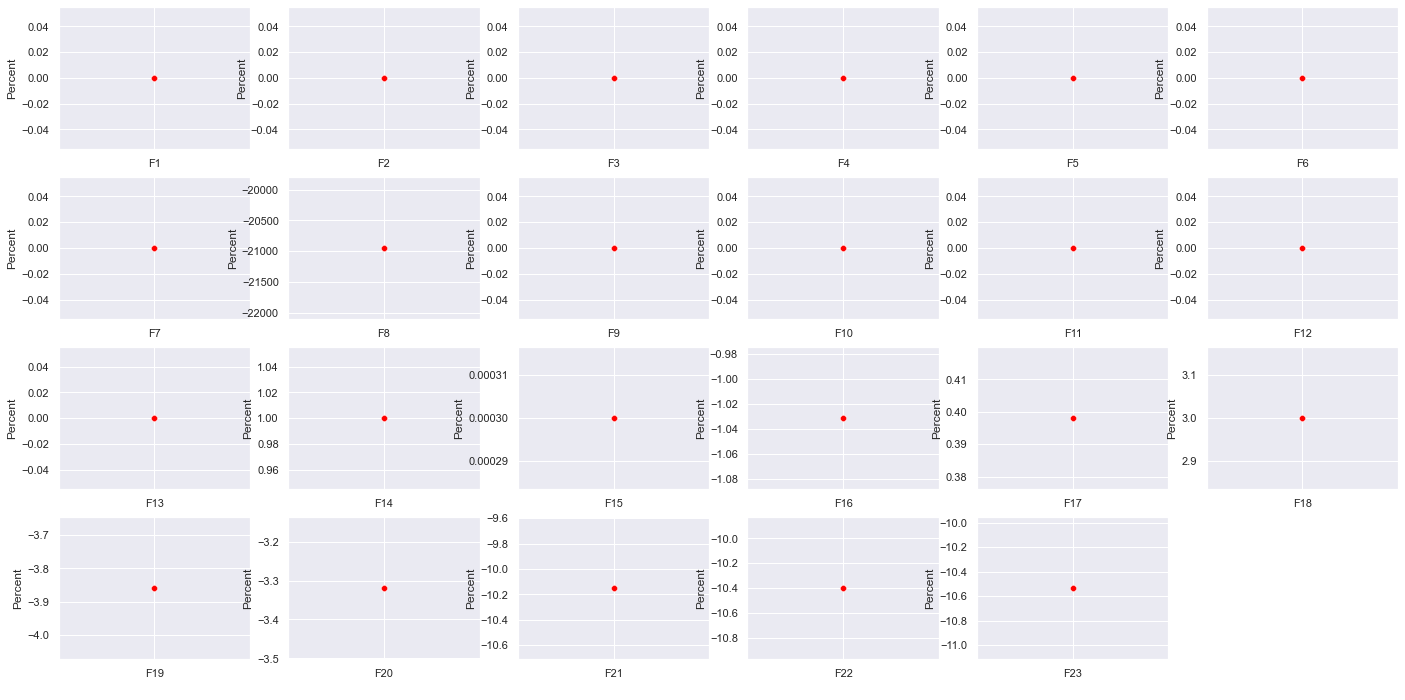

In [19]:
def show_graph(dataframe):
    sns.set()
    dist_cols = 6
    dist_rows = 4
    plt.figure(figsize=(4 * dist_cols, 3 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        dataf2 = cdf[cdf["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        # sns.boxplot(data=dataf, y="Percent", x="Function",hue="Mode",palette="viridis")
        sns.scatterplot(data=dataf2,y="optimal",x="Function",color ="red")
        plt.xlabel(" ")
        plt.ylabel("Percent")
        i = i + 1
    plt.savefig("./together_Percent_optimal_{0}.pdf".format("lamarck_SSGA_Baldwin"), dpi=1200)
    plt.show()
show_graph(dataframe=dataframe)